First few rows of the dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
--

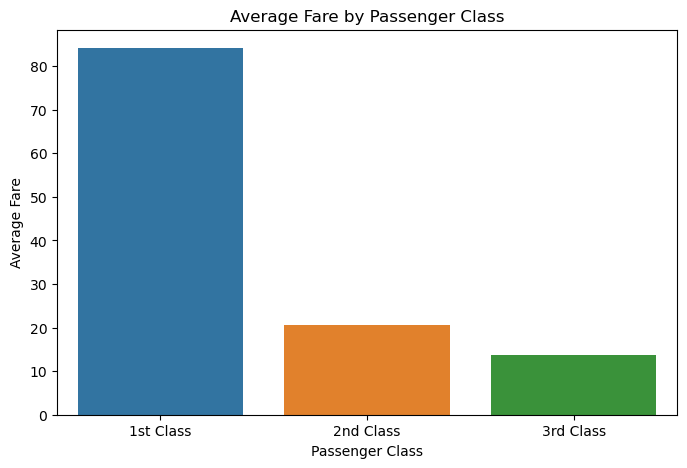

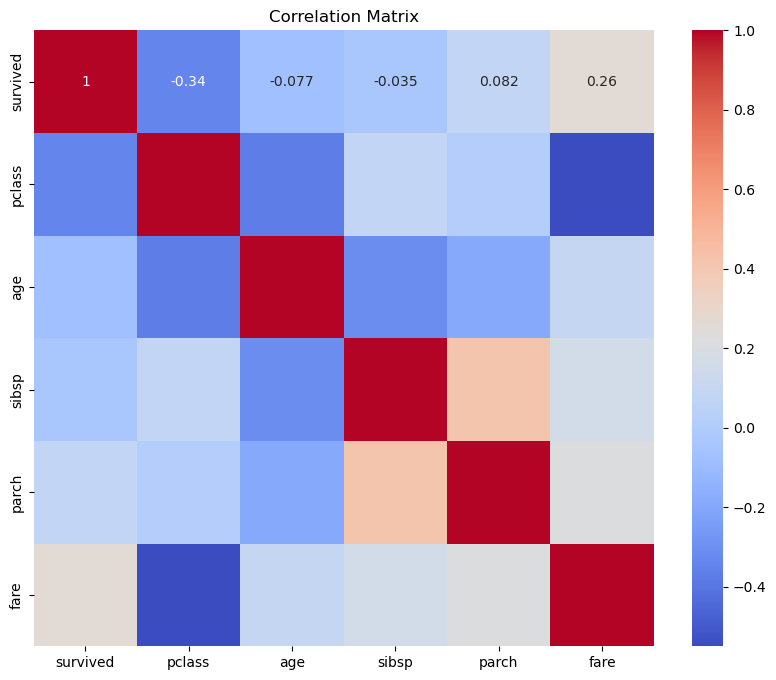


Aggregated data:
             fare               
             mean   median count
pclass                          
1       84.154687  60.2875   216
2       20.662183  14.2500   184
3       13.675550   8.0500   491


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset from Seaborn
df = sns.load_dataset('titanic')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(df.info())

# Print the column names to check their exact names
print("\nColumn names in the DataFrame:")
print(df.columns.tolist())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Drop rows with missing 'fare' or 'pclass' (or fill them if necessary)
df.dropna(subset=['fare', 'pclass'], inplace=True)  # Adjusted to match column names from the dataset

# Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())

# Calculate the average fare grouped by class
average_fare = df.groupby('pclass')['fare'].mean()  # Adjusted to match column names from the dataset
print("\nAverage fare by class:")
print(average_fare)

# Visualizing the average fare by class
plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare.index, y=average_fare.values)
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])  # Adjusting x-ticks for better clarity
plt.show()

# Correlation matrix
# Select only numeric columns for correlation
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Aggregating data to get more insights
aggregated_data = df.groupby('pclass').agg({'fare': ['mean', 'median', 'count']})
print("\nAggregated data:")
print(aggregated_data)
